In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\HUS\DSA\Lab_2\results.csv")

print(data)


   Input(n)  Binary Search (ms)  Sieve Prime (ms)  GCD (ms)  Count Bits (ms)
0      1000                   0             0.000     0.000            0.000
1     10000                   0             1.515     0.000            0.000
2    100000                   0             5.073     5.579            1.286
3    500000                   0            21.863    26.068            9.282
4   1000000                   0            40.126    62.008           18.057


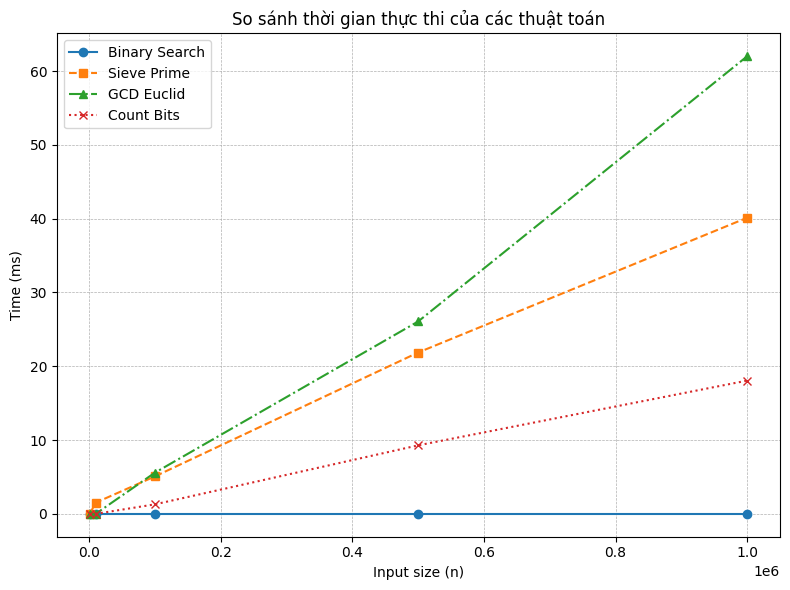

In [17]:
data.columns = ["n", "BinarySearch", "SievePrime", "GCD", "CountBits"]
plt.figure(figsize=(8,6))

plt.plot(data["n"], data["BinarySearch"], 'o-', label="Binary Search")    
plt.plot(data["n"], data["SievePrime"], 's--', label="Sieve Prime")        
plt.plot(data["n"], data["GCD"], '^-.', label="GCD Euclid")                
plt.plot(data["n"], data["CountBits"], 'x:', label="Count Bits")          

plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.title("So sánh thời gian thực thi của các thuật toán")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig("anh.png", dpi=300, bbox_inches='tight')
plt.show()

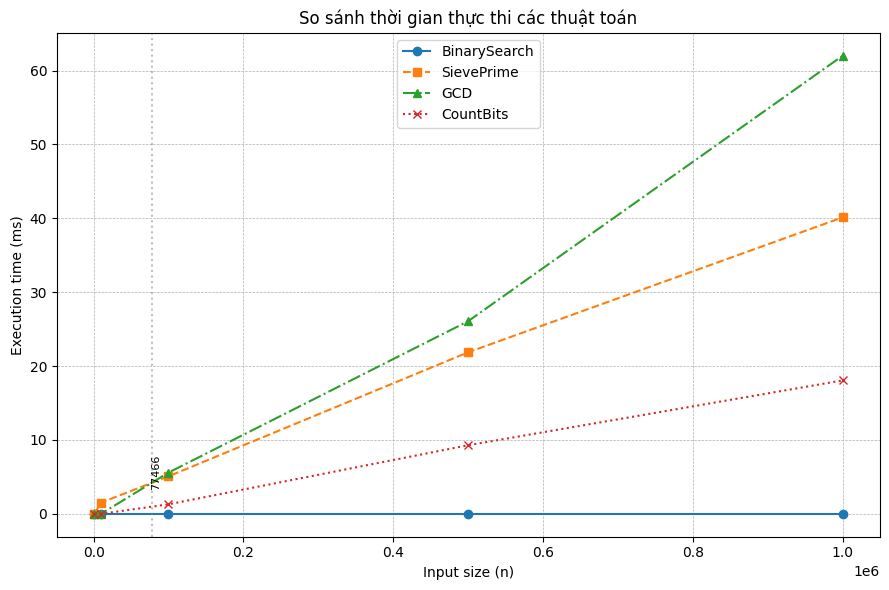

In [24]:
data = data.sort_values("n")

def find_intersections(x, y1, y2):
    crossings = []
    diff = y1 - y2
    for i in range(1, len(x)):
        if diff[i - 1] * diff[i] < 0: 
            x_cross = x[i - 1] + (x[i] - x[i - 1]) * abs(diff[i - 1]) / (abs(diff[i - 1]) + abs(diff[i]))
            crossings.append(x_cross)
    return crossings
algos = ["BinarySearch", "SievePrime", "GCD", "CountBits"]
styles = ['o-', 's--', '^-.' , 'x:']

plt.figure(figsize=(9,6))
for algo, style in zip(algos, styles):
    plt.plot(data["n"], data[algo], style, label=algo)

plt.xlabel("Input size (n)")
plt.ylabel("Execution time (ms)")
plt.title("So sánh thời gian thực thi các thuật toán")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

pairs = [
    ("BinarySearch", "SievePrime"),
    ("BinarySearch", "GCD"),
    ("BinarySearch", "CountBits"),
    ("SievePrime", "GCD"),
    ("SievePrime", "CountBits"),
    ("GCD", "CountBits")
]

for (a, b) in pairs:
    x = data["n"].values
    y1 = data[a].values
    y2 = data[b].values
    xs = find_intersections(x, y1, y2)
    for xc in xs:
        plt.axvline(x=xc, color="gray", linestyle=":", alpha=0.5)
        plt.text(xc, plt.ylim()[1]*0.05, f"{int(xc)}", rotation=90,
                 verticalalignment='bottom', fontsize=8, color="black")
plt.tight_layout()
plt.savefig("sosanh.png", dpi=300)
plt.show()
